# Palmer Penguin Data Exploration
This notebook loads a dataset on penguin properties and performs exploratory data analysis on the dataset.\
1. Install necessary packages
2. Load the dataset using the request package
3. Dataset properties
4. Plot bill depth by species

Initialize conda environment:

```{sh}
$ conda create -n explore_penguin_dataset -c conda-forge python=3.12 kagglehub pandas matplotlib
```

In [9]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import os

Requests for downloading the dataset.
Pandas for dataframe creation and data exploration.

In [15]:
path = kagglehub.dataset_download("samybaladram/palmers-penguin-dataset-extended")

output_dir_list = os.listdir(path)
print(f"Output dir list: {output_dir_list}")
path_to_csv = path + "/" + output_dir_list[1]
print(f"Full path: {path_to_csv}")

Output dir list: ['palmerpenguins_original.csv', 'palmerpenguins_extended.csv']
Full path: /Users/thiloschmid/.cache/kagglehub/datasets/samybaladram/palmers-penguin-dataset-extended/versions/2/palmerpenguins_extended.csv


Kagglehub downloads the dataset to a directory in the cashe.\
Construct the correct path to the csv of the extended dataset.

In [16]:
penguins_df = pd.read_csv(path_to_csv)
print(f"Dataframe shape: {penguins_df.shape}")
print(f"Number of NAs: {penguins_df.isnull().sum()}")
penguins_df.describe()

Dataframe shape: (3430, 11)
Number of NAs: species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
year                 0
dtype: int64


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000
mean,38.529825,18.447143,207.028863,4834.710496,2023.348397
std,13.175171,2.774428,28.944765,1311.091310,1.313797
min,13.600000,9.100000,140.000000,2477.000000,2021.000000
25%,28.900000,16.600000,185.000000,3843.500000,2022.000000
50%,34.500000,18.400000,203.000000,4633.500000,2024.000000
75%,46.600000,20.300000,226.000000,5622.000000,2024.000000
max,88.200000,27.900000,308.000000,10549.000000,2025.000000


Display dataframe properties.\
Dataframe contains 3000 + rows with no NA values.

In [17]:
species = penguins_df['species'].unique()

data_by_species = [penguins_df[penguins_df['species'] == s]['bill_depth_mm'] for s in species]

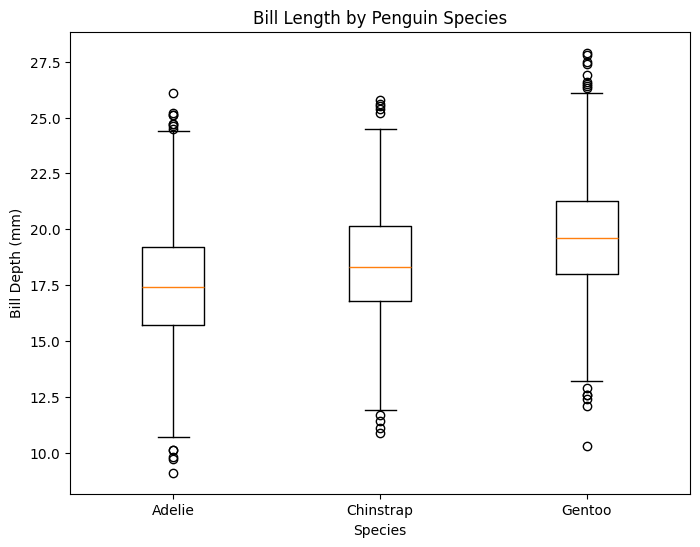

In [18]:
plt.figure(figsize=(8, 6))
plt.boxplot(data_by_species, tick_labels=species)
plt.title("Bill Length by Penguin Species")
plt.xlabel("Species")
plt.ylabel("Bill Depth (mm)")
plt.grid(False)
plt.show()

Bill depth in mm is highest for Gentoo spec. and lowest for Adelie spec.